In [109]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import pandas as pd
import re
import math
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D 

In [110]:
mkt = pd.read_csv("C:\AI\data\marketing_campaign.csv", sep='\t')
mkt.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [111]:
mkt = mkt.dropna()
# tần suất giao dịch
mkt['Frequency'] = sum([mkt['NumCatalogPurchases'],mkt['NumWebPurchases'],mkt['NumStorePurchases']])
# tổng số tiền khách chi tiêu
mkt['Monetary'] = sum([mkt['MntWines'],mkt['MntFruits'],mkt['MntMeatProducts'],mkt['MntFishProducts'],mkt['MntSweetProducts'],mkt['MntGoldProds']])
mkt['Age'] = 2024-mkt['Year_Birth']
mkt = mkt.drop(['Teenhome','Z_CostContact','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], axis=1)
mkt = mkt.drop(['Response','Z_Revenue','Year_Birth','Education','Marital_Status','Dt_Customer','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDealsPurchases'], axis=1)
mkt.head()

,ID,Income,Kidhome,Recency,Complain,Frequency,Monetary,Age
0,5524,58138.0,0,58,0,22,1617,67
1,2174,46344.0,1,38,0,4,27,70
2,4141,71613.0,0,26,0,20,776,59
3,6182,26646.0,1,26,0,6,53,40
4,5324,58293.0,1,94,0,14,422,43


In [112]:
def identify_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = [value for value in data if value < lower_bound or value > upper_bound]
    return outliers
outliers = identify_outliers(mkt['Income'])
mkt = mkt[~mkt['Income'].isin(outliers)]
outliers = identify_outliers(mkt['Frequency'])
mkt = mkt[~mkt['Frequency'].isin(outliers)]
outliers = identify_outliers(mkt['Monetary'])
mkt = mkt[~mkt['Monetary'].isin(outliers)]

In [113]:
X = mkt.values[:,1:]
# X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

# Elbow method

Đây là 1 phương pháp dùng để xác định số lượng cụm tối ưu cho 1 mô hình. Cách elbow method hoạt động:
- Thực hiện thuật toán phân cụm với 1 loạt giá trị k khác nhau
- Với mỗi k, tính tổng chi phí (inertia) để đánh giá chất lượng của phân cụm
- Vẽ biểu đồ của giá trị tổng chi phí theo số lượng cụm k
- Quan sát biểu đồ, xem xét nơi mà tổng chi phí giảm đột ngột và trở nên chậm, điểm đó thường được gọi là elbow
- Số lượng cụm k ứng với điểm elbow là số lượng cụm tối ưu cho mô hình phân cụm

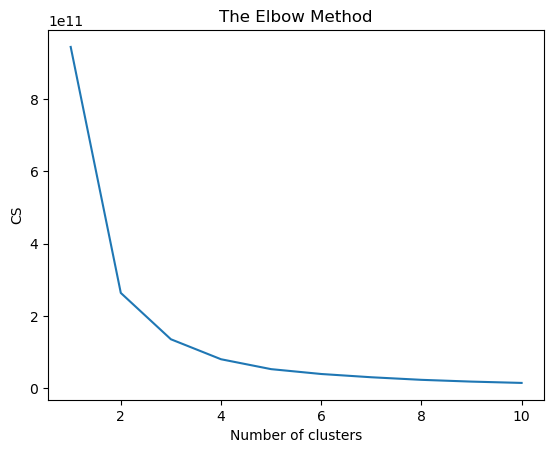

In [114]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
#   n_cluster: số lượng cụm
#   init: phương pháp khởi tạo center
#   max_iter: Số lần lặp tối đa cho mỗi lần khởi tạo cụm
#   n_init: số lần tạo cụm ngẫu nhiên
    kmeans.fit(X)
    cs.append(kmeans.inertia_) 
#   inertia chứa tổng khoảng cách bình phương
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

=> k = 2 có thể được coi là số cụm tốt cho data

In [115]:
k = 2
k_means = KMeans(init='k-means++', n_clusters=k, n_init=13)
k_means.fit(X)
labels = k_means.labels_
set(labels)

{0, 1}

In [116]:
center = k_means.cluster_centers_
center = np.array(center)
center

array([[6.94757863e+04, 1.54486586e-01, 4.90490287e+01, 6.47548566e-03,
        1.81424607e+01, 1.06619426e+03, 5.74939870e+01],
       [3.43725916e+04, 7.19750890e-01, 4.90044484e+01, 1.24555160e-02,
        7.17437722e+00, 1.60010676e+02, 5.30364769e+01]])

In [117]:
mkt['Clus'] = labels
mkt.groupby('Clus').mean()

,ID,Income,Kidhome,Recency,Complain,Frequency,Monetary,Age
Clus,,,,,,,,
0,5610.677449,69459.586876,0.154344,49.050832,0.006470,18.135860,1065.496303,57.486137
1,5567.476402,34356.941229,0.720392,49.002671,0.012467,7.170971,159.876224,53.040071


k-means chia data thành 2 cụm:
- Giàu, thường xuyên mua hàng và chi nhiều tiền cho mỗi lần giao dịch
- Thu nhập trung bình, không thường xuyên mua hàng và chi ít tiền cho mỗi lần giao dịch

# biểu đồ tán xạ


In [118]:
mkt_ifm = mkt[['Income','Frequency','Monetary']]
ifm = mkt_ifm.values[:,:]
ifm

array([[5.8138e+04, 2.2000e+01, 1.6170e+03],
       [4.6344e+04, 4.0000e+00, 2.7000e+01],
       [7.1613e+04, 2.0000e+01, 7.7600e+02],
       ...,
       [5.6981e+04, 1.8000e+01, 1.2410e+03],
       [6.9245e+04, 2.1000e+01, 8.4300e+02],
       [5.2869e+04, 8.0000e+00, 1.7200e+02]])

C:\Users\lkkk\AppData\Local\Temp\ipykernel_13444\3688532946.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(ifm[:, 0], ifm[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)


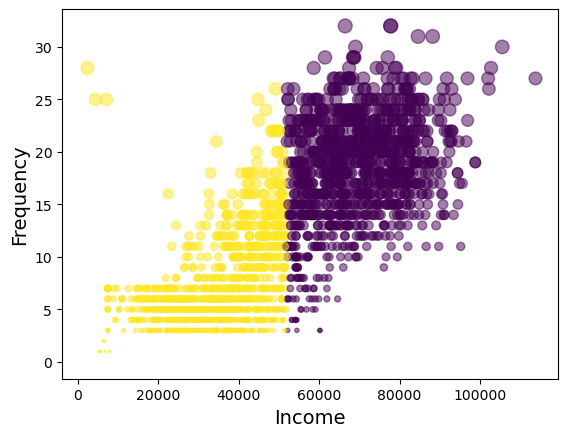

In [119]:
area = np.pi * ( ifm[:, 1])  
plt.scatter(ifm[:, 0], ifm[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

C:\Users\lkkk\AppData\Local\Temp\ipykernel_13444\3888211398.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(ifm[:, 2], ifm[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)


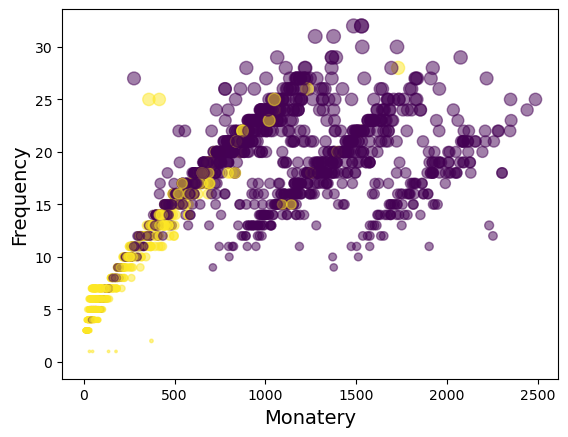

In [120]:
area = np.pi * ( ifm[:, 1])  
plt.scatter(ifm[:, 2], ifm[:, 1], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Monatery', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

C:\Users\lkkk\AppData\Local\Temp\ipykernel_13444\3548733767.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(ifm[:,0], ifm[:,1], ifm[:,2], c=labels.astype(np.float), marker='o')


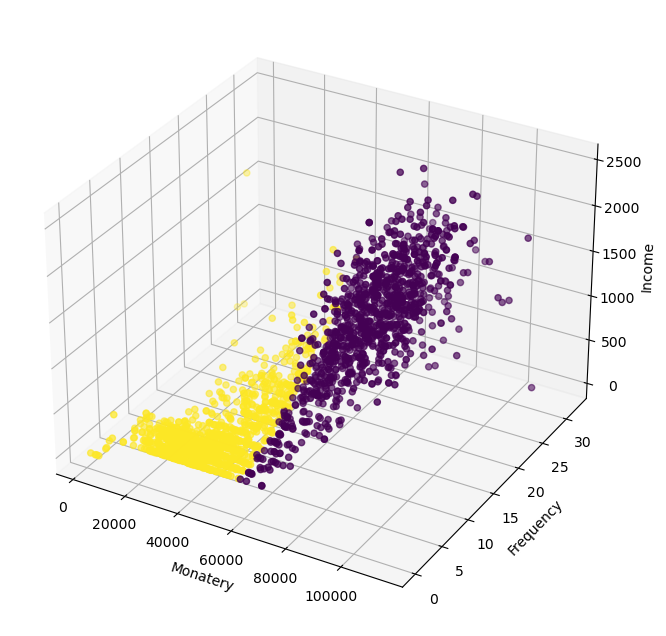

In [121]:
k = np.amax(labels)+1
#   tạo hình mới có kích thước 10x8 
fig = plt.figure(figsize=(10, 8))
# Sử dụng projection='3d' để tạo biểu đồ 3D
ax = fig.add_subplot(111, projection='3d')

# Vẽ scatter plot
ax.scatter(ifm[:,0], ifm[:,1], ifm[:,2], c=labels.astype(np.float), marker='o')
# ax.scatter(center[:,0], center[:,2], center[:,1], c='red', marker='o')
ax.set_xlabel('Monatery')
ax.set_ylabel('Frequency')
ax.set_zlabel('Income')

plt.show()